In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Distgen Check

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0
  sigma_xy:
    units: um
    value: 100
  type: rsg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 5
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: ps
    value: 10
  type: sg
total_charge:
  units: nC
  value: 5

>


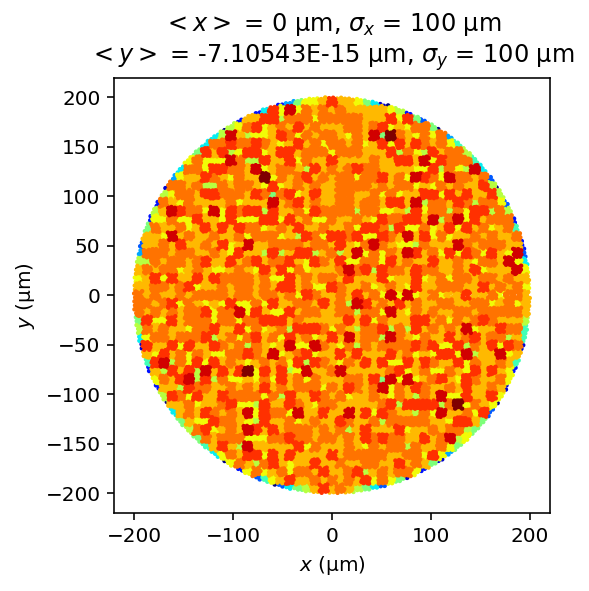

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_dist1d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE)
print(gen)
beam = gen.beam()

plot_dist2d(beam,'x', 'um', 'y', 'um', axis='equal', title_on=True);

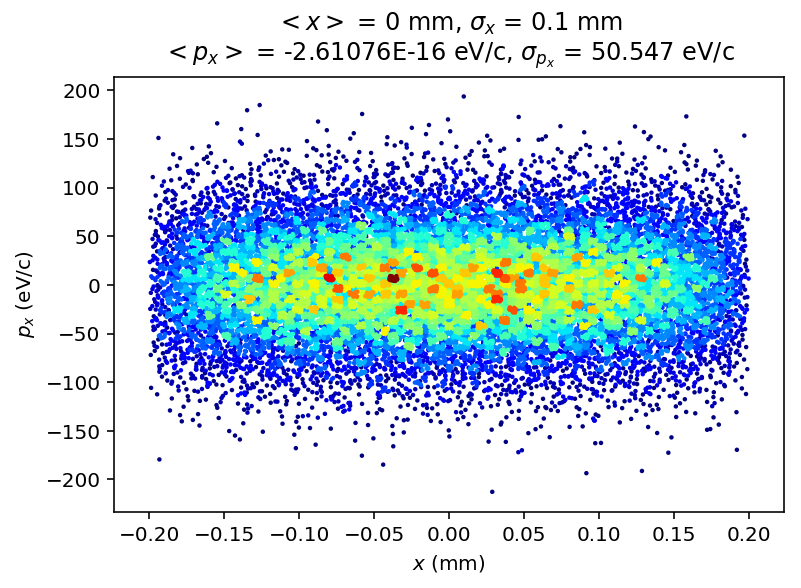

In [3]:
plot_dist2d(beam,'x', 'mm', 'px', 'eV/c', nbins=75, title_on=True);

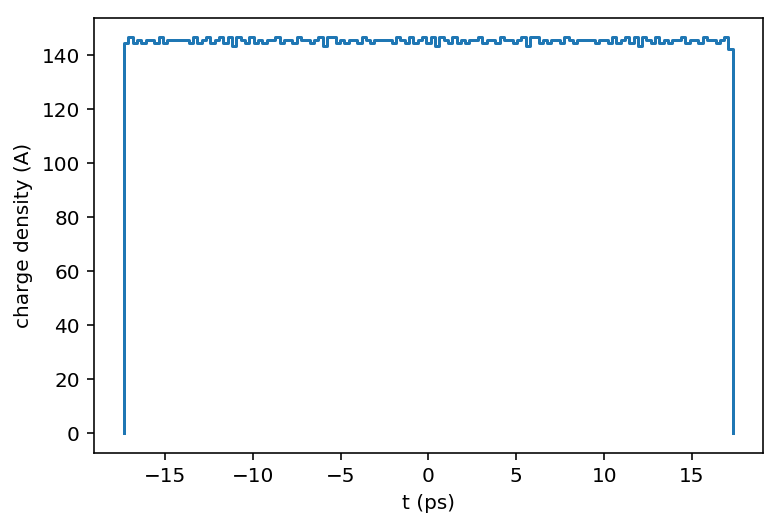

In [4]:
plot_current_profile(beam, 'ps', 'A')

# Run GPT with Distgen

Its often useful to run the GPT input file without setting anything, just to make sure there are no syntax errors in the file.  

In [5]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [6]:
GPT_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')

PC1 = 1000
PC2 = 1000

settings={'n_particle':200, 
          'PC1':PC1,
          'PC10':PC1,
          'PC2':PC2,
          'PC20':PC2
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True)
print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpohffc62r/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 200.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 10 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 50.547 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 50.547 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 50.547 eV/c
   Shifting avg_

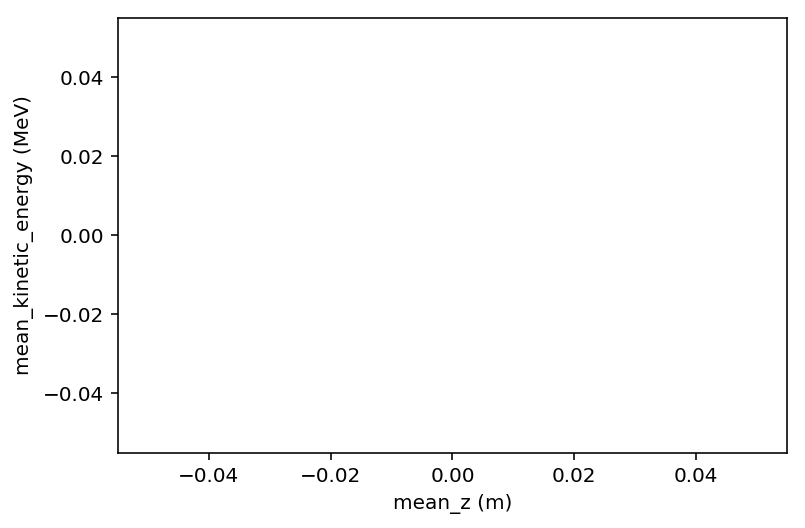

In [7]:
key1 = 'mean_z'
key2 = 'mean_kinetic_energy'
dat1 = G.stat(key1)
dat2 = G.stat(key2)/1e6
units1 = G.stat_units(key1)
units2 = G.stat_units(key2)

fig, ax = plt.subplots()
ax.plot(dat1, dat2)
ax.set_xlabel(key1+f' ({units1})');
ax.set_ylabel(key2+f' (MeV)');

# Run GPT with Distgen and energy gain cavity auto phasing


In [8]:
PC1 = 79e6
PC2 = 79e6

settings={'n_particle':2000, 
          'space_charge':1,
          't_dist:sigma_t:value':10,
          't_dist:sigma_t:units': 'ps',
          'PC1':PC1,
          'PC10':PC1,
          'PC2':PC2,
          'PC20':PC2
         }

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         auto_phase=True,
                         verbose=True,
                         gpt_verbose=False)

print(G)

Run GPT with Distgen:
Replacing param n_particle with value 2000
space_charge is in gpt
Replacing param t_dist:sigma_t:value with value 10
Replacing param t_dist:sigma_t:units with value ps
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpvuu7yg28/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 2000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 10 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 50.547 eV/c
   py distribution: Gaussian
      avg_

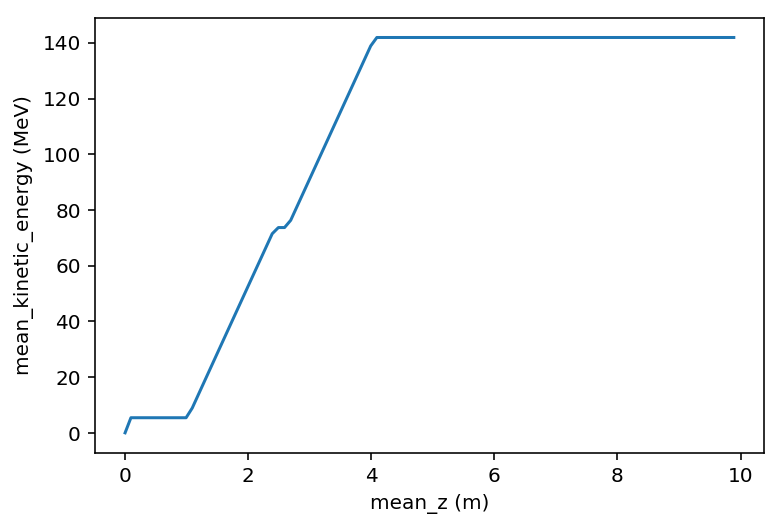

In [9]:
fig, ax = plt.subplots()
ax.plot(G.stat('mean_z','tout'), G.stat('mean_kinetic_energy','tout')/1e6)
ax.set_xlabel(key1+f' (m)');
ax.set_ylabel(key2+f' (MeV)');

In [10]:
from gpt.evaluate import evaluate

result = evaluate(settings=settings,
                  simulation='gpt_with_distgen',
                  gpt_input_file=GPT_INPUT_FILE,
                  distgen_input_file=DISTGEN_INPUT_FILE,
                  verbose=True,
                  auto_phase=True
                 )

Run GPT with Distgen:
Replacing param n_particle with value 2000
space_charge is in gpt
Replacing param t_dist:sigma_t:value with value 10
Replacing param t_dist:sigma_t:units with value ps
PC1 is in gpt
PC10 is in gpt
PC2 is in gpt
PC20 is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpbi9olnhs/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 5 nC.
   Number of macroparticles: 2000.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 141.421 µm, power = INF
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      simga_t = 10 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 50.547 eV/c
   py distribution: Gaussian
      avg_

In [11]:
result

{'error': False,
 'end_n_particle': 1168,
 'end_norm_emit_x': 5.746542809835375e-05,
 'end_norm_emit_y': 5.700297576786658e-05,
 'end_higher_order_energy_spread': 177264.48088755613,
 'end_mean_x': 5.2297334727465815e-05,
 'end_sigma_x': 0.004049154703171164,
 'end_min_x': -0.011925474361754819,
 'end_max_x': 0.01168995394926273,
 'end_mean_y': 2.731581023937869e-05,
 'end_sigma_y': 0.004059341669537614,
 'end_min_y': -0.011823097707280683,
 'end_max_y': 0.012087029610610778,
 'end_mean_z': 4.254172397058823,
 'end_sigma_z': 9.46704097546792e-16,
 'end_min_z': 4.254172397058823,
 'end_max_z': 4.2541723970588246,
 'end_mean_r': 0.004748171691911319,
 'end_sigma_r': 0.003214382576654217,
 'end_min_r': 0.00011826996085239335,
 'end_max_r': 0.01208791265430728,
 'end_mean_theta': -0.020328815915574568,
 'end_sigma_theta': 1.8002838729278308,
 'end_min_theta': -3.0995849816902648,
 'end_max_theta': 3.139040897603579,
 'end_mean_px': 285.22601351867087,
 'end_sigma_px': 26560.405170416438,
 